# Stellar Object Classification

Importing Libraries

In [1]:
# import libraries
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
star_data = pd.read_csv("star_classification.csv")

In [3]:
star_data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [4]:
star_data.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [5]:
star_data.shape

(100000, 18)

In [6]:
star_data.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [7]:
star_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

Checking Missing Values and Handling them

In [8]:
star_data.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

As the ID columns are the unique values for the dataset we are checking the values and dreoping form the dataset

In [9]:
columns = ['obj_ID', 'run_ID', 'rerun_ID', 'field_ID', 'spec_obj_ID', 'fiber_ID']

# Loop through the column names and calculate unique values for each
for col in columns:
    unique_count = star_data[col].nunique()
    print(f"The unique values in {col} are {unique_count}")

The unique values in obj_ID are 78053
The unique values in run_ID are 430
The unique values in rerun_ID are 1
The unique values in field_ID are 856
The unique values in spec_obj_ID are 100000
The unique values in fiber_ID are 1000


As we see the above values obj_ID, Spec_obj_ID have many unique values and the rerun has only one for all the records. So, we will remove all the ID values that will not be used to identify the celestial object.

In [10]:
star_data.drop(columns= columns, axis= 1, inplace= True)

In [11]:
star_data.head()

,alpha,delta,u,g,r,i,z,cam_col,class,redshift,plate,MJD
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,2,GALAXY,0.634794,5812,56354
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,5,GALAXY,0.779136,10445,58158
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,2,GALAXY,0.644195,4576,55592
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,3,GALAXY,0.932346,9149,58039
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,3,GALAXY,0.116123,6121,56187


In [12]:
star_data.columns

Index(['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'cam_col', 'class',
       'redshift', 'plate', 'MJD'],
      dtype='object')

Exploratory Data Analysis (EDA)

In [13]:
data = star_data.drop(columns='class', axis= 1)
data.head()

,alpha,delta,u,g,r,i,z,cam_col,redshift,plate,MJD
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,2,0.634794,5812,56354
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,5,0.779136,10445,58158
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,2,0.644195,4576,55592
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,3,0.932346,9149,58039
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,3,0.116123,6121,56187


In [14]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [15]:
data

array([[0.37690482, 0.50380246, 0.99911256, ..., 0.09183086, 0.45159189,
        0.64800655],
       [0.40228576, 0.49181212, 0.99920216, ..., 0.11238889, 0.8288413 ,
        0.89432004],
       [0.39495978, 0.53413882, 0.99925055, ..., 0.09316979, 0.35094862,
        0.54396505],
       ...,
       [0.62384846, 0.33880973, 0.99884246, ..., 0.02183899, 0.20340363,
        0.399645  ],
       [0.58962907, 0.6429744 , 0.99925925, ..., 0.06622931, 0.52805146,
        0.64991808],
       [0.54692681, 0.67052516, 0.99898725, ..., 0.07874916, 0.58171159,
        0.75040961]])

In [16]:
data = pd.DataFrame(data= data, columns= ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'cam_col', 
       'redshift', 'plate', 'MJD'])

In [17]:
data.head()

,alpha,delta,u,g,r,i,z,cam_col,redshift,plate,MJD
0,0.376905,0.503802,0.999113,0.999070,0.535344,0.427665,0.998944,0.2,0.091831,0.451592,0.648007
1,0.402286,0.491812,0.999202,0.999126,0.646203,0.515986,0.999225,0.8,0.112389,0.828841,0.894320
2,0.394960,0.534139,0.999251,0.999109,0.546218,0.435729,0.998959,0.2,0.093170,0.350949,0.543965
3,0.940947,0.180600,0.998939,0.999220,0.596946,0.486717,0.998990,0.4,0.134210,0.723312,0.878072
4,0.959118,0.392679,0.998670,0.998602,0.337999,0.287021,0.998620,0.4,0.017959,0.476753,0.625205


In [18]:
data['class'] = star_data['class']

In [19]:
data.head()

,alpha,delta,u,g,r,i,z,cam_col,redshift,plate,MJD,class
0,0.376905,0.503802,0.999113,0.999070,0.535344,0.427665,0.998944,0.2,0.091831,0.451592,0.648007,GALAXY
1,0.402286,0.491812,0.999202,0.999126,0.646203,0.515986,0.999225,0.8,0.112389,0.828841,0.894320,GALAXY
2,0.394960,0.534139,0.999251,0.999109,0.546218,0.435729,0.998959,0.2,0.093170,0.350949,0.543965,GALAXY
3,0.940947,0.180600,0.998939,0.999220,0.596946,0.486717,0.998990,0.4,0.134210,0.723312,0.878072,GALAXY
4,0.959118,0.392679,0.998670,0.998602,0.337999,0.287021,0.998620,0.4,0.017959,0.476753,0.625205,GALAXY


Checking Distribution of the target variable 'class' before analysis

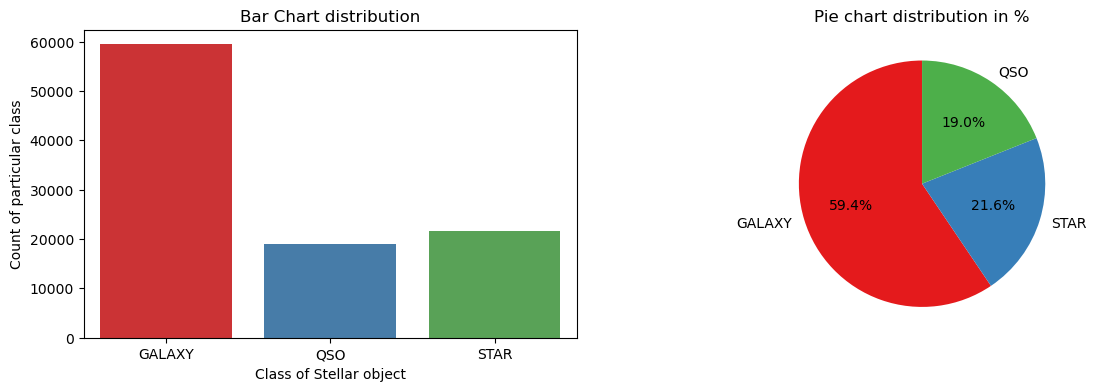

In [20]:
plt.figure(figsize= (14,4))

plt.subplot(1,2,1)
palette_colors = sns.color_palette("Set1")
ax = sns.countplot(data= data, x= 'class', palette= palette_colors)
plt.xlabel("Class of Stellar object")
plt.ylabel("Count of particular class")
plt.title("Bar Chart distribution")


plt.subplot(1,2,2)
distribution = data['class'].value_counts()
plt.pie(x=distribution, labels= distribution.index, autopct= '%1.1f%%', startangle=90, colors= sns.color_palette('Set1') )
plt.title("Pie chart distribution in %")
plt.show()

We have an imbalanced data target distribution.

## Outlier Analysis

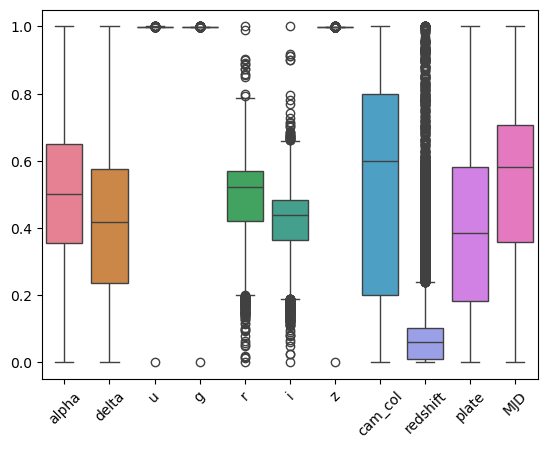

In [21]:
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.show()

From the above plot we can see there are ouliers in the columns 'u', 'g', 'r', 'i', 'z', and more in 'red shift'. Let us try to remove them.

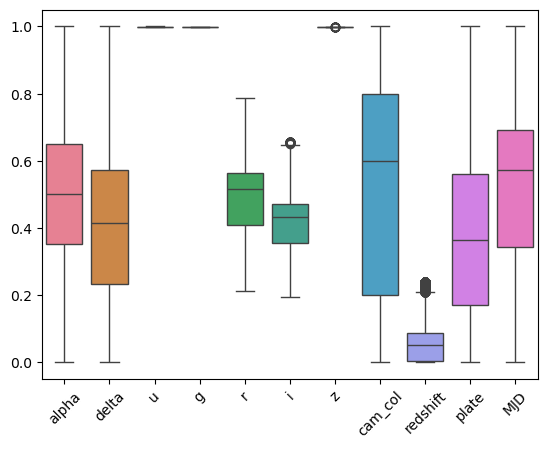

In [22]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Filter out the outliers
    filtered_df = df[(df[column] >= lower) & (df[column] <= upper)]
    return filtered_df

# Create a copy of the data
data_clean = data.copy()

# Remove outliers for each numeric column
for col in data_clean.select_dtypes(include='number').columns:
    data_clean = remove_outliers(data_clean, col)

# Plot the boxplot with outliers removed
sns.boxplot(data=data_clean)
plt.xticks(rotation=45)
plt.show()

In [23]:
# Let us now check the percent of ouliers compared to data with outlier
removed_percent = ((data.shape[0] - data_clean.shape[0]) / data.shape[0]) * 100
print(f'Pencentage of outliers removed from the data set is {removed_percent}%')

Pencentage of outliers removed from the data set is 9.4%


# Univariate Analysis

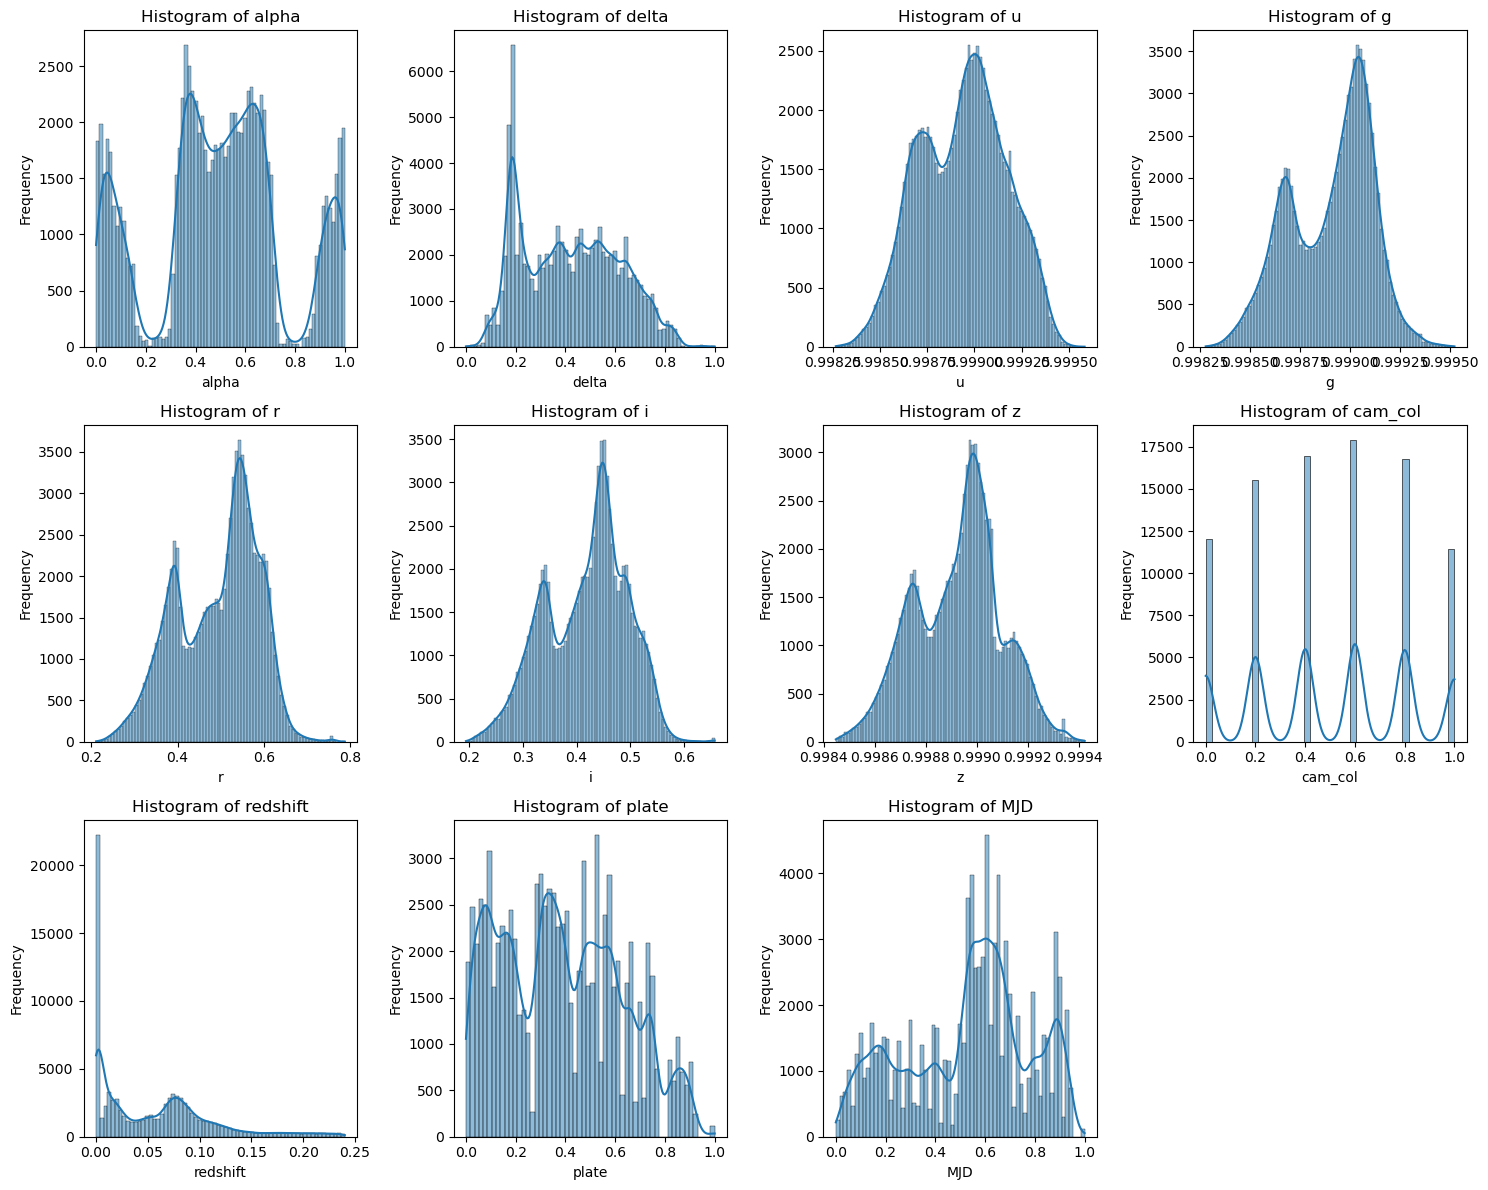

In [24]:
import math

# Select numeric columns from the dataset
numeric_columns = data_clean.select_dtypes(include='number').columns

# Calculate the number of rows needed based on the number of columns
n_cols = 4
n_rows = math.ceil(len(numeric_columns) / n_cols)

# Set up the subplot grid with 3 columns
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 4))

# Flatten axes in case it's a 2D array
axes = axes.flatten()

# Create a histogram for each numeric column
for i, col in enumerate(numeric_columns):
    sns.histplot(data_clean[col], ax=axes[i], kde=True)  # Plot with KDE curve
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove empty subplots, if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [26]:
data_clean.columns

Index(['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'cam_col', 'redshift',
       'plate', 'MJD', 'class'],
      dtype='object')

In [27]:
columns1 = ['alpha', 'delta', 'u', 'g', 'r', 'class']
columns2 = ['i', 'z', 'cam_col', 'redshift', 'plate', 'MJD', 'class']

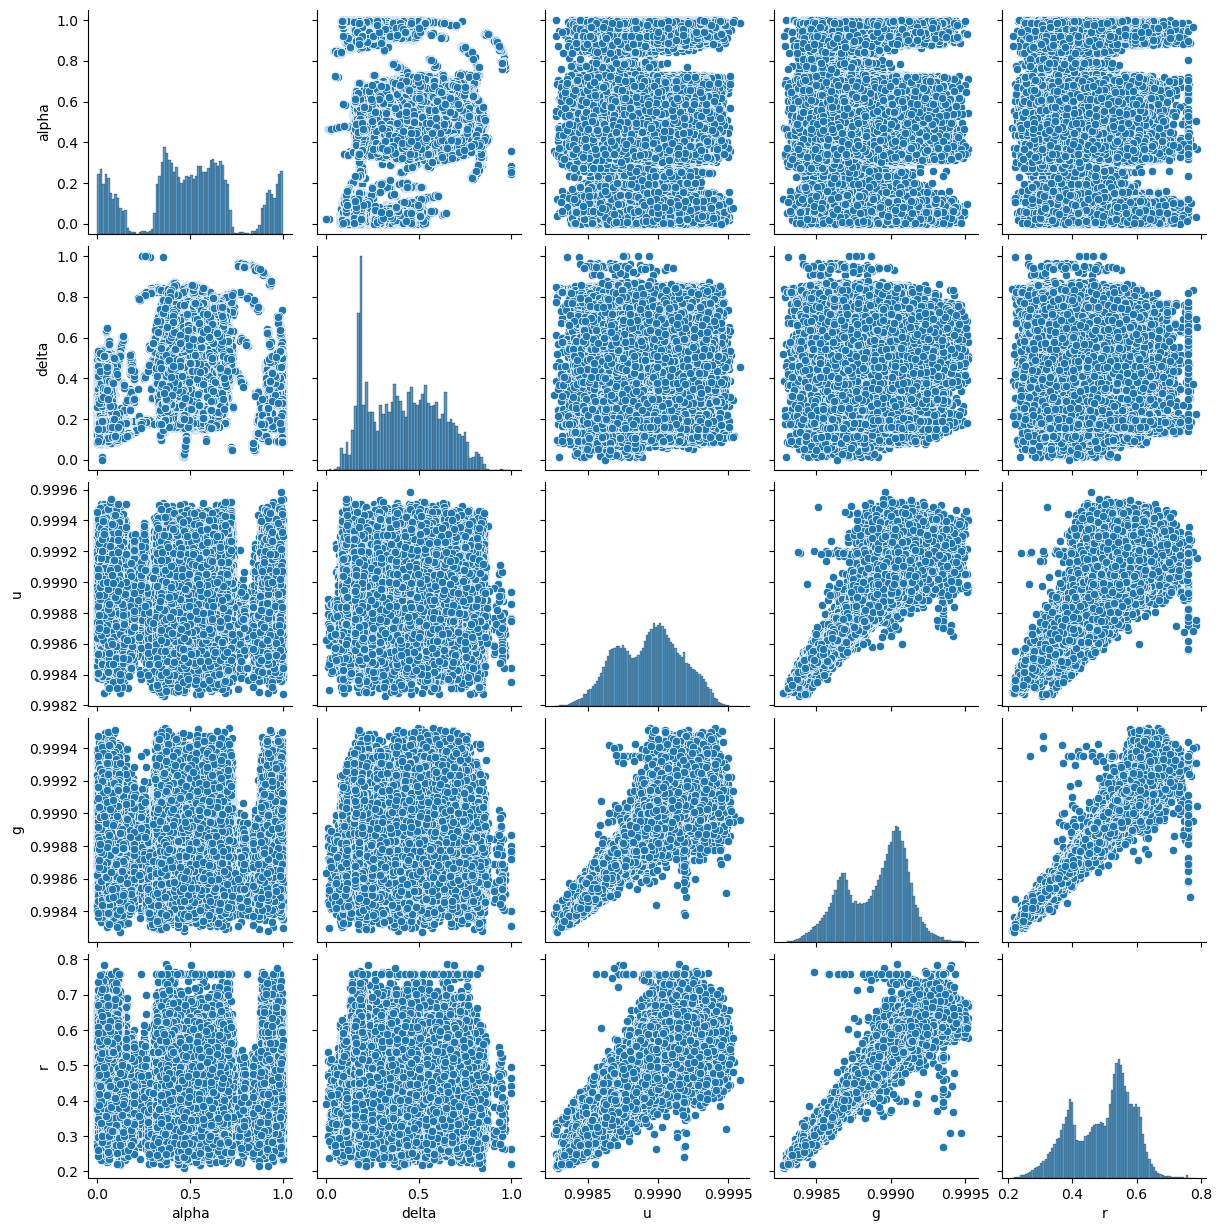

In [31]:
sns.pairplot(data=data_clean[columns1])
plt.show()

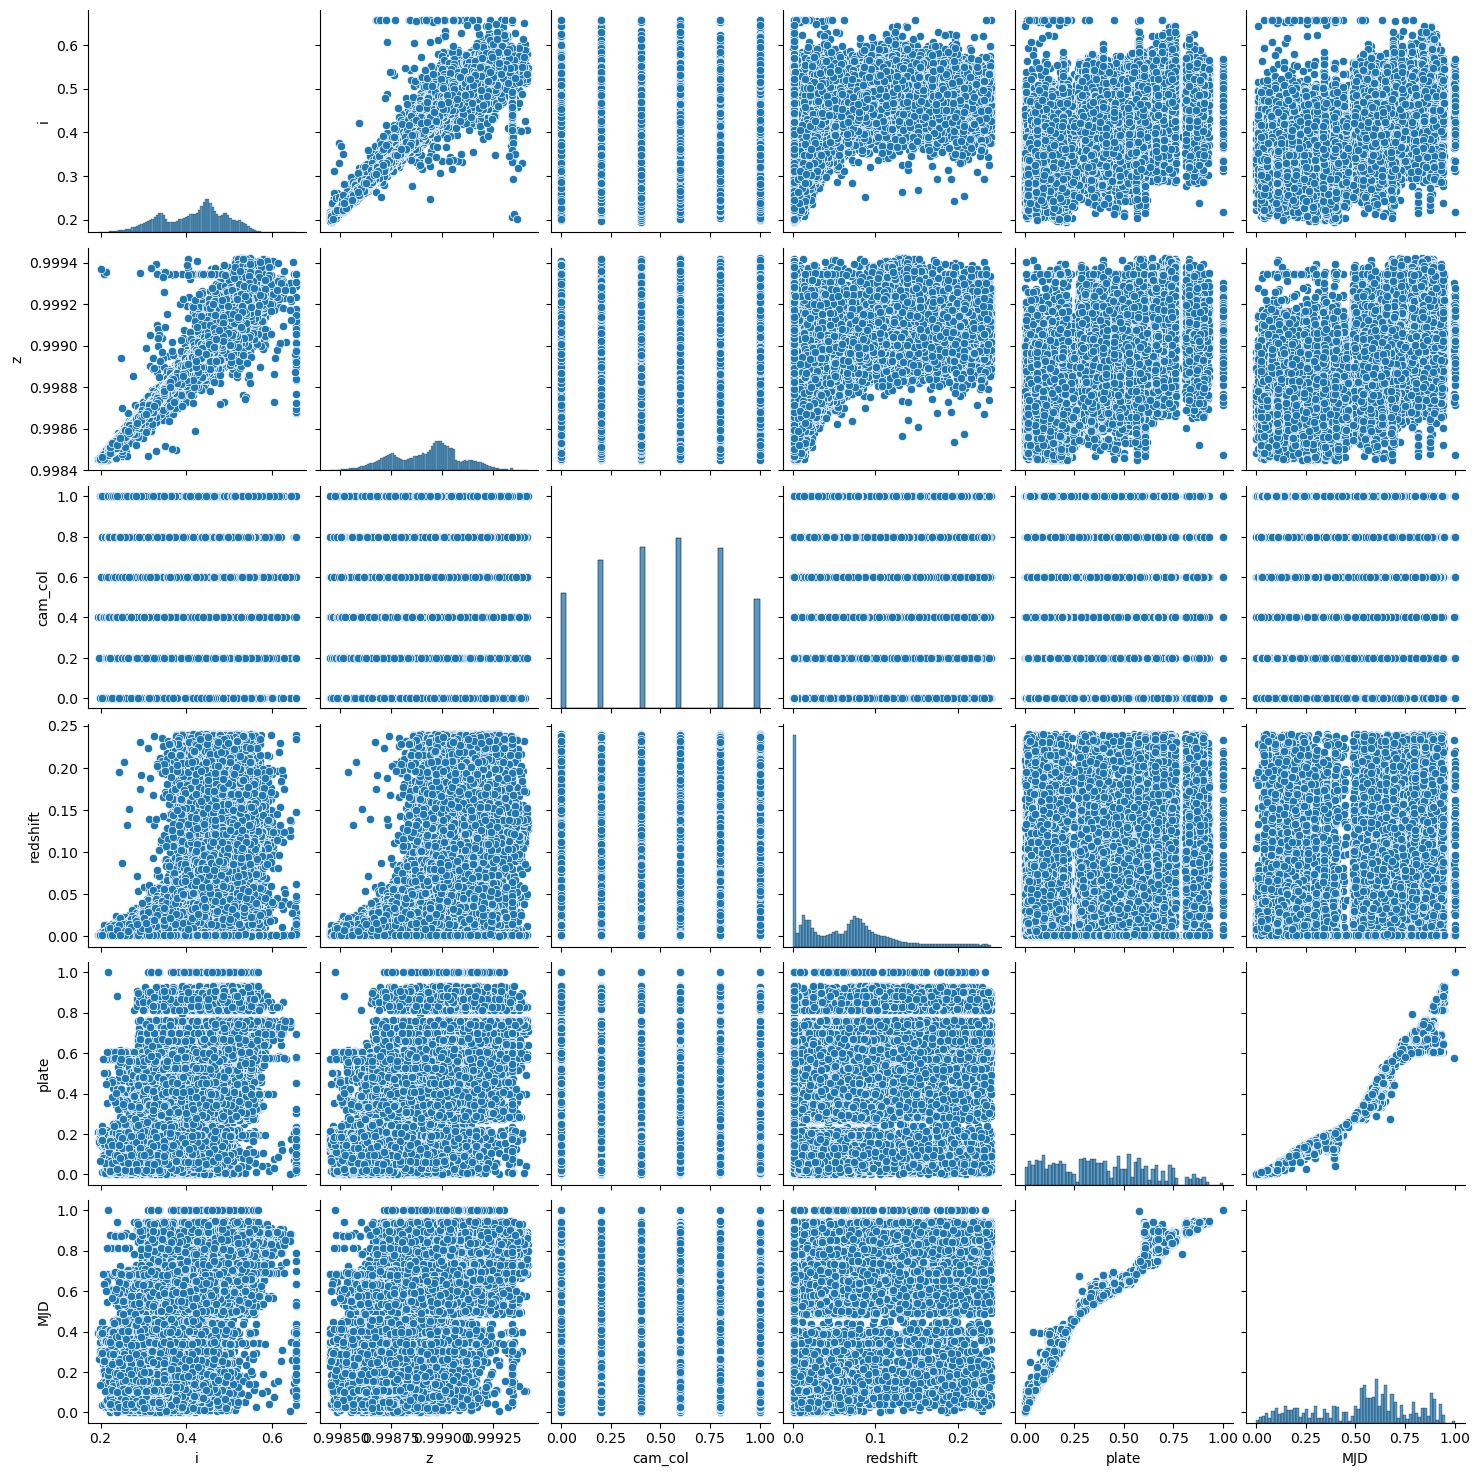

In [32]:
sns.pairplot(data=data_clean[columns2])
plt.show()